## Task 1

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder ,StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

In [222]:
df = pd.read_csv("../DataSets/heart.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [223]:
##split the data  into x and y

x = df.drop("HeartDisease",axis = 1)
y = df["HeartDisease"]
x.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up


In [224]:
## standard deviation 
std_devs = df.std()
print(std_devs)

Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64


C:\Users\Barcha\AppData\Local\Temp\ipykernel_13644\1787614816.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_devs = df.std()


In [183]:
## Will apply all the math function in it
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


C:\Users\Barcha\AppData\Local\Temp\ipykernel_13644\2068051862.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heCorr = df.corr()


<Axes: >

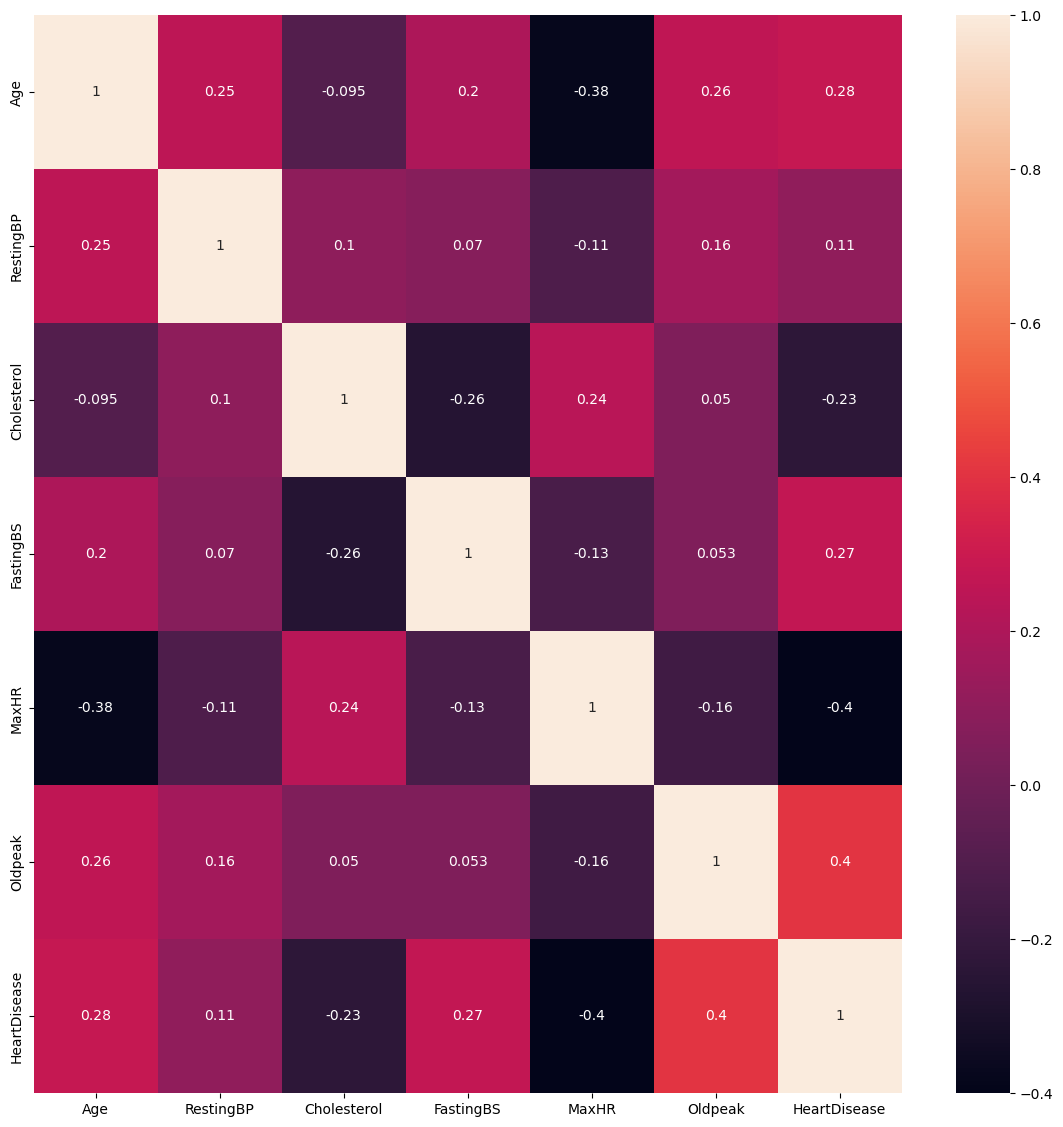

In [184]:
heCorr = df.corr()
plt.figure(figsize = (14,14))
sns.heatmap(heCorr , annot = True)


In [185]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

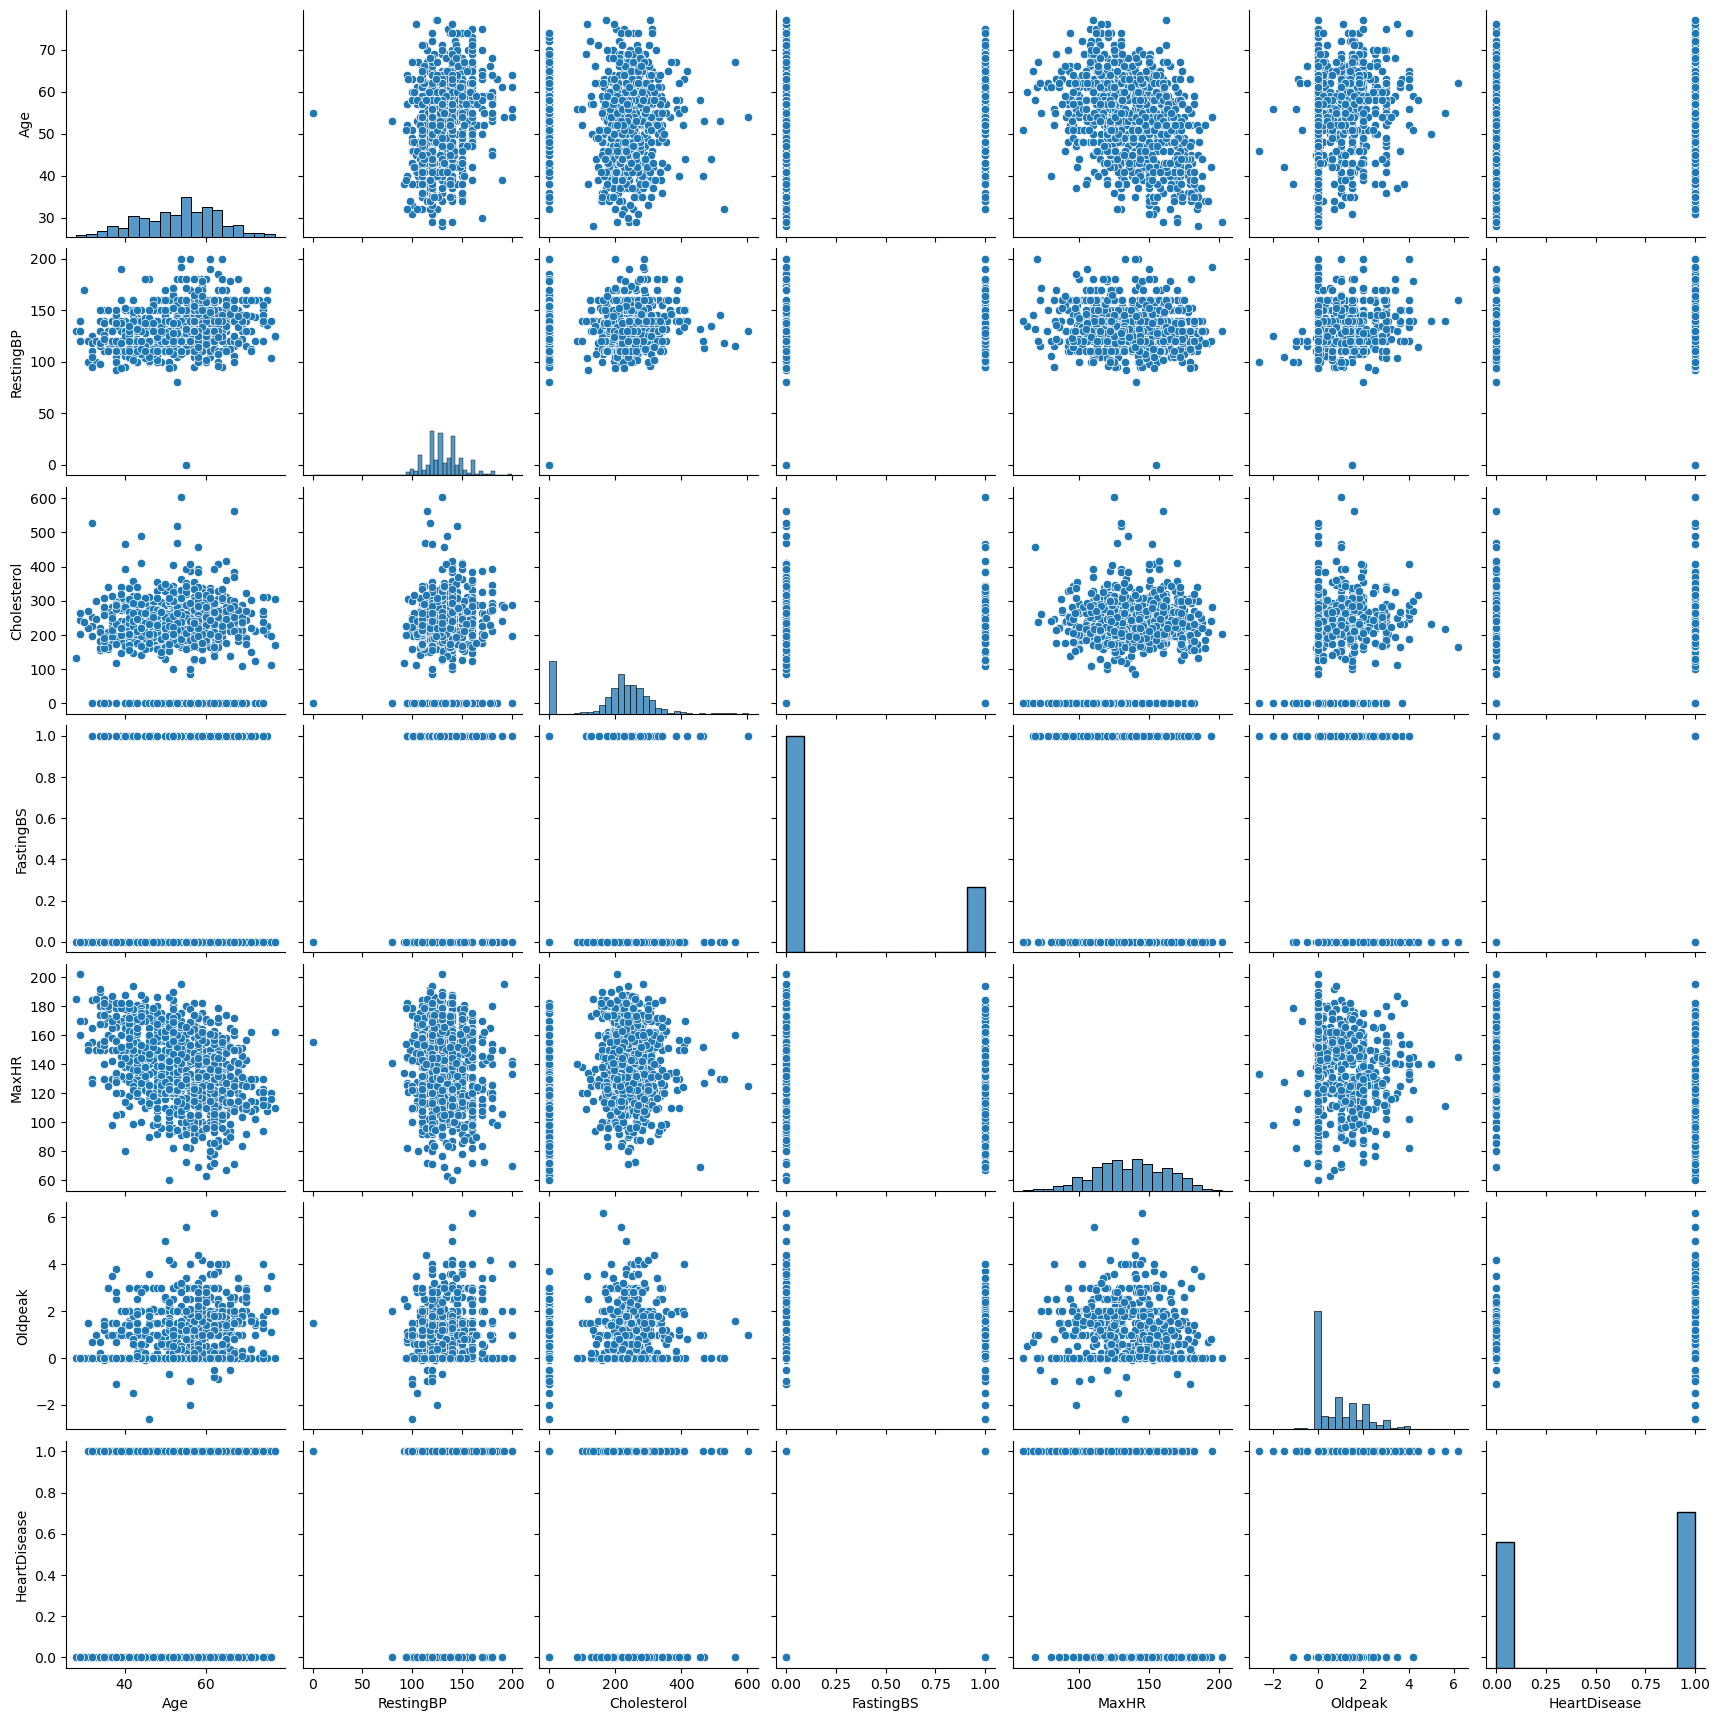

In [225]:
sns.pairplot(df)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

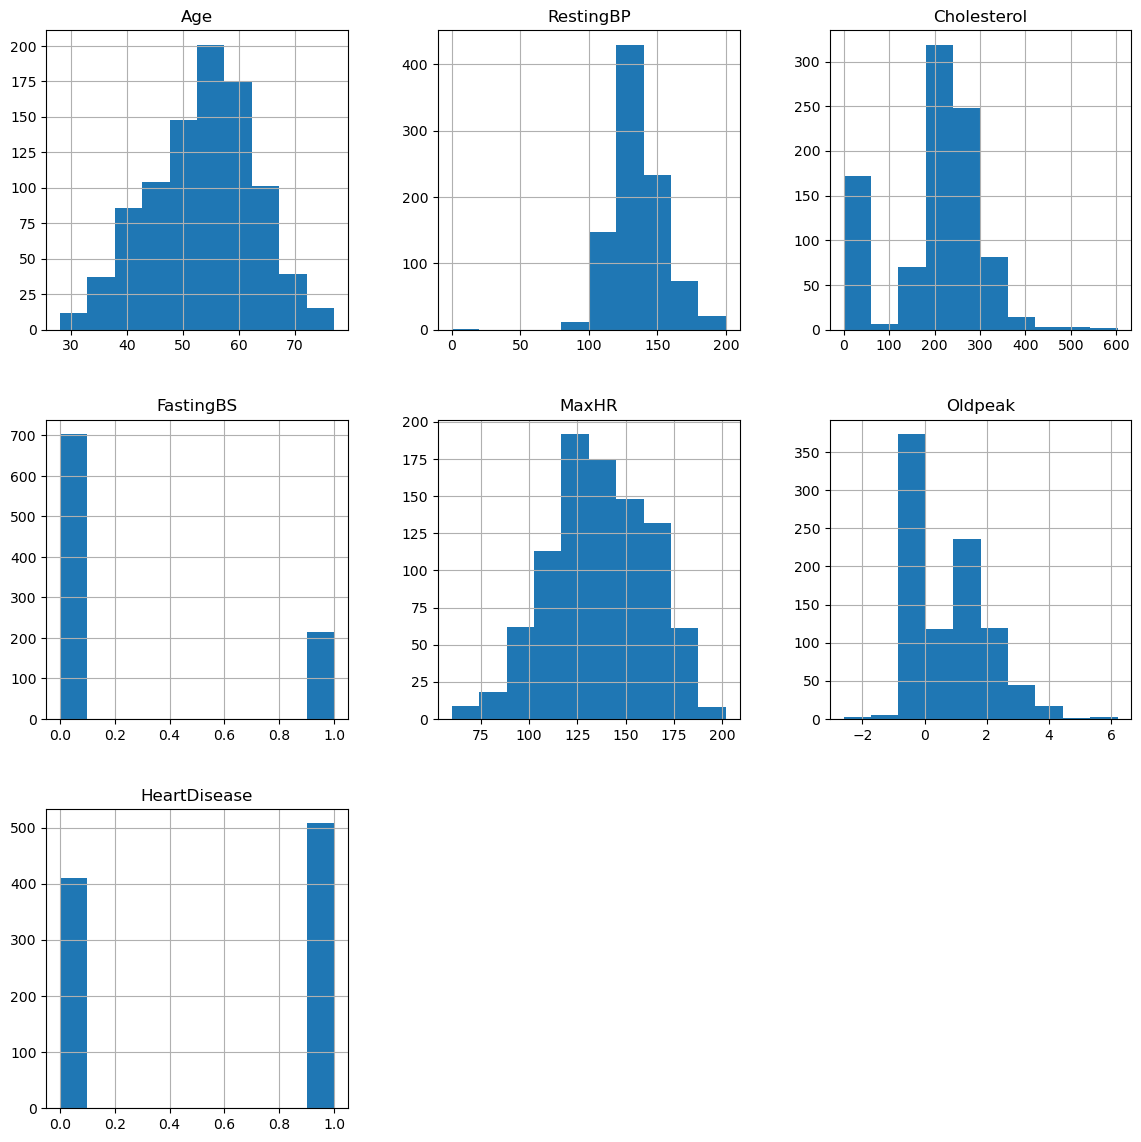

In [229]:

df.hist(figsize = [14,14])


In [186]:
## Data preprocessing 

encoder = OneHotEncoder()
scaling = StandardScaler()

categorical  = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
numerical = ["Age","RestingBP","Cholesterol","MaxHR","FastingBS" ,"Oldpeak"]

transform = ColumnTransformer([("categ",encoder ,categorical),
                             ("scaling",scaling ,numerical)],remainder = "passthrough")

x_trans = transform.fit_transform(x)
x_trans


array([[ 0.        ,  1.        ,  0.        , ...,  1.38292822,
        -0.55134134, -0.83243239],
       [ 1.        ,  0.        ,  0.        , ...,  0.75415714,
        -0.55134134,  0.10566353],
       [ 0.        ,  1.        ,  0.        , ..., -1.52513802,
        -0.55134134, -0.83243239],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.85706875,
        -0.55134134,  0.29328271],
       [ 1.        ,  0.        ,  0.        , ...,  1.4615246 ,
        -0.55134134, -0.83243239],
       [ 0.        ,  1.        ,  0.        , ...,  1.42222641,
        -0.55134134, -0.83243239]])

In [187]:
## Split the data into train test 
np.random.seed(42)
x_train ,x_test ,y_train ,y_test = train_test_split(x_trans ,y ,test_size = 0.3 ,random_state = 43)

# SVC Model

In [188]:
## model selection

svc = SVC(C=0.5 ,kernel = "rbf")
svc.fit(x_train ,y_train)
svc.score(x_test ,y_test)




0.855072463768116

In [189]:
## Hyperparameter tunning

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 500], 
              'gamma': [1, 0.1, 0.001, 0.0001],
              'kernel': ['rbf' ,"poly" , "linear"] } 
  
grid = GridSearchCV(svc, param_grid, verbose = 2 ,cv = 3)
  
# fitting the model for grid search
svcHyper = grid.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ..................C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END .........................C=500, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=500, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=500, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=500, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=500, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................

In [190]:
svcHyper.best_score_

0.8878504672897196

In [191]:
svcHyper.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [192]:
## y_pred
y_pred = svc.predict(x_test)
print(accuracy_score(y_test ,y_pred))


0.855072463768116


In [193]:
sm = confusion_matrix(y_test ,y_pred)
sm

array([[ 94,  22],
       [ 18, 142]], dtype=int64)

<Axes: >

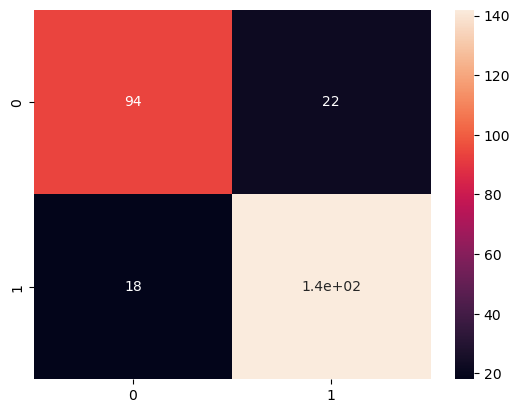

In [194]:
sns.heatmap(sm ,annot = True)

## DecisionTreeClassifier

In [195]:
## Use decion tree model
dec = DecisionTreeClassifier()
dec.fit(x_train ,y_train)
dec.score(x_test ,y_test)

0.7463768115942029

In [196]:
## y_pred
y_pred = dec.predict(x_test)
print(accuracy_score(y_test ,y_pred))


0.7463768115942029


In [197]:
s = confusion_matrix(y_test ,y_pred)
s

array([[ 84,  32],
       [ 38, 122]], dtype=int64)

<Axes: >

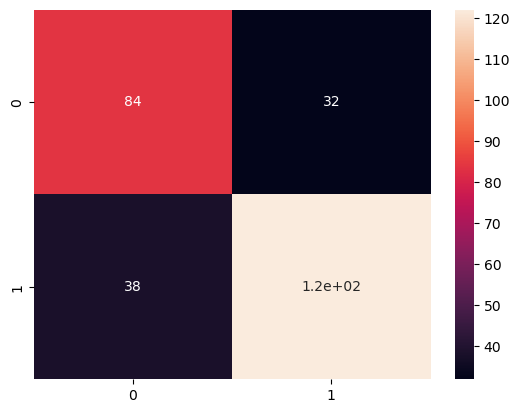

In [198]:
sns.heatmap(s ,annot = True)

## RandomForestclassifier

In [199]:
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(x_train ,y_train)
clf.score(x_test ,y_test)

0.8695652173913043

In [200]:
## y_pred
y_pred = clf.predict(x_test)
print(accuracy_score(y_test ,y_pred))

0.8695652173913043


In [201]:
f = confusion_matrix(y_test ,y_pred)
f

array([[ 98,  18],
       [ 18, 142]], dtype=int64)

<Axes: >

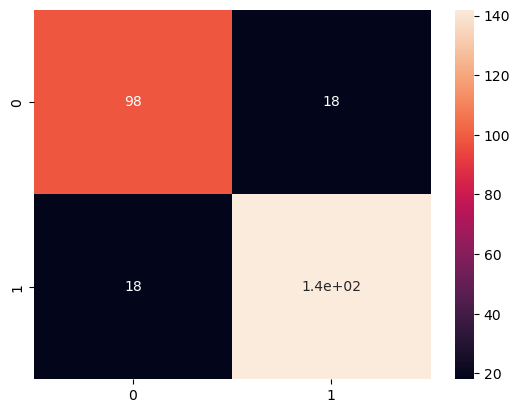

In [202]:
sns.heatmap(f ,annot = True)

## Comparing the scores

In [203]:
print("svc accuracy score",svc.score(x_test ,y_test))
print("decision accuracy score",dec.score(x_test ,y_test))
print("RandomForest accuracy score",clf.score(x_test ,y_test))

svc accuracy score 0.855072463768116
decision accuracy score 0.7463768115942029
RandomForest accuracy score 0.8695652173913043


## TAsk 2

In [204]:
## Read the dataset

data = pd.read_csv("../DataSets/Churn_Modelling.csv")
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [205]:
##split the data  into x and y
df = data.drop(["RowNumber","CustomerId"] ,axis =1)
x = df.drop("Exited",axis = 1)
y = df["Exited"]
x.head(2)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [206]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [207]:
## Now do the preprocessing ( Label Encoding & StandardScaling)


scaling = StandardScaler()
encoder = OneHotEncoder()

category =["Surname","Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]
numerical = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

transform = ColumnTransformer([("numerical",scaling,numerical),
                             ("category",encoder,category)],remainder="passthrough")
trans_x = transform.fit_transform(x)
trans_x.shape

(10000, 2950)

In [208]:
## Split the data into train test 
np.random.seed(42)
x_train ,x_test ,y_train ,y_test = train_test_split(trans_x ,y ,test_size = 0.3 ,random_state = 43)

In [209]:
## Import necessary libraries

import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense


## For relu

In [210]:
## Create a ANN 

model = Sequential()


model.add(Dense(32, activation='relu', input_shape=(2950,)))

model.add(Dense(12, activation='relu'))


model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 32)                94432     
                                                                 
 dense_44 (Dense)            (None, 12)                396       
                                                                 
 dense_45 (Dense)            (None, 2)                 26        
                                                                 
Total params: 94854 (370.52 KB)
Trainable params: 94854 (370.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [211]:
## Encode y_labels using onehotencoder

from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

history = model.fit(x_train ,y_train_encoded ,batch_size = 32 ,epochs = 10 )

Epoch 1/10
219/219 [==============================] - 2s 4ms/step - loss: 0.4698 - accuracy: 0.7993
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3599 - accuracy: 0.8499
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3232 - accuracy: 0.8719
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.2902 - accuracy: 0.8876
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.2599 - accuracy: 0.8979
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.2312 - accuracy: 0.9100
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.2100 - accuracy: 0.9186
Epoch 8/10
219/219 [==============================] - 1s 4ms/step - loss: 0.1921 - accuracy: 0.9270
Epoch 9/10
219/219 [==============================] - 1s 4ms/step - loss: 0.1760 - accuracy: 0.9321
Epoch 10/10
219/219 [==============================] - 1s 5ms/step - loss: 0.1624 - accuracy: 0.9367

In [212]:
y_predict_encoded = model.predict(x_test)
y_preds = np.argmax(y_predict_encoded,axis = 1)
model.evaluate(x_test , y_test_encoded)

94/94 [==============================] - 1s 4ms/step - loss: 0.4874 - accuracy: 0.8093


[0.48743578791618347, 0.809333324432373]

In [213]:
accuracy_score(y_test ,y_preds)

0.8093333333333333

[[2138  249]
 [ 323  290]]


<Axes: >

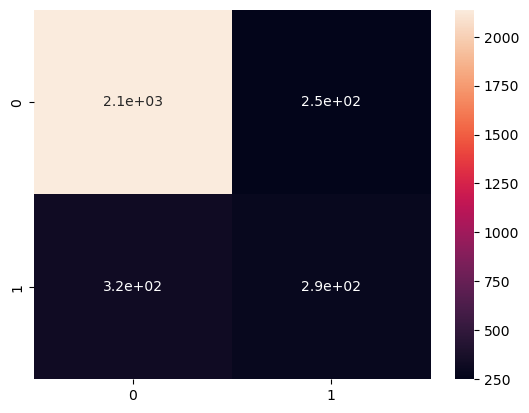

In [214]:
an = confusion_matrix(y_test ,y_preds)
print(an)
sns.heatmap(an ,annot = True)

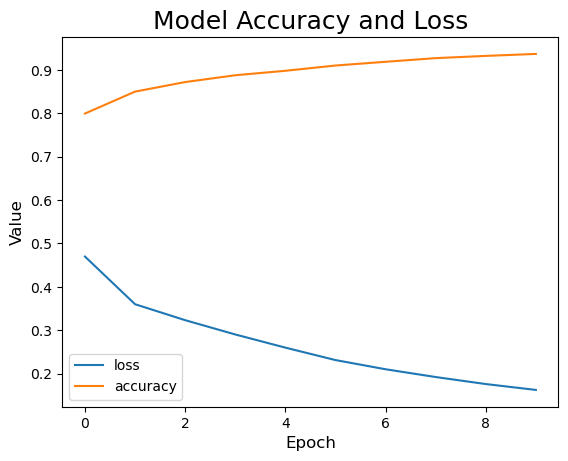

In [215]:
plt.plot(history.epoch , history.history["loss"])
plt.plot(history.epoch , history.history["accuracy"])
plt.title("Model Accuracy and Loss", fontsize=18)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(["loss" ,"accuracy"])
plt.show()

## For Tanh

In [216]:
## Create a ANN  for relu activation

model = Sequential()


model.add(Dense(32, activation='tanh', input_shape=(2950,)))

model.add(Dense(12, activation='tanh'))


model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 32)                94432     
                                                                 
 dense_47 (Dense)            (None, 12)                396       
                                                                 
 dense_48 (Dense)            (None, 2)                 26        
                                                                 
Total params: 94854 (370.52 KB)
Trainable params: 94854 (370.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [217]:
## Encode y_labels using onehotencoder

from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

history = model.fit(x_train ,y_train_encoded ,batch_size = 32 ,epochs = 10 )

Epoch 1/10
219/219 [==============================] - 2s 3ms/step - loss: 0.4502 - accuracy: 0.8053
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3615 - accuracy: 0.8493
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8631
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.3035 - accuracy: 0.8769
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.2838 - accuracy: 0.8861
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.2714 - accuracy: 0.8894
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.2628 - accuracy: 0.8873
Epoch 8/10
219/219 [==============================] - 1s 5ms/step - loss: 0.2551 - accuracy: 0.8940
Epoch 9/10
219/219 [==============================] - 1s 4ms/step - loss: 0.2490 - accuracy: 0.8951
Epoch 10/10
219/219 [==============================] - 1s 4ms/step - loss: 0.2476 - accuracy: 0.8973

In [218]:
y_predict_encoded = model.predict(x_test)
y_preds = np.argmax(y_predict_encoded,axis = 1)
model.evaluate(x_test , y_test_encoded)

94/94 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.8183


[0.48287254571914673, 0.8183333277702332]

In [219]:
accuracy_score(y_test ,y_preds)

0.8183333333333334

[[2216  171]
 [ 374  239]]


<Axes: >

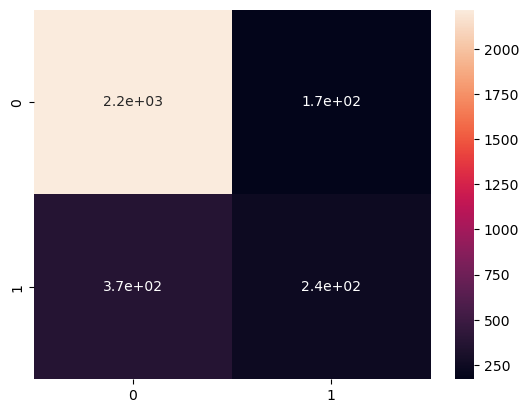

In [220]:
an = confusion_matrix(y_test ,y_preds)
print(an)
sns.heatmap(an ,annot = True)